# Dealing with Outliers

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

from sklearn.neighbors import LocalOutlierFactor

In [3]:
d1 = np.loadtxt("data/outlier_1d.txt")
d2 = np.loadtxt("data/outlier_2d.txt")
d3 = np.loadtxt("data/outlier_curve.txt")

print(d1.shape, d2.shape)

(1010,) (1010, 2)


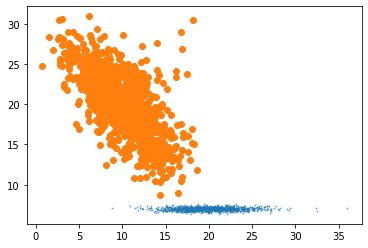

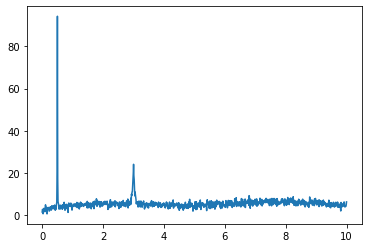

In [4]:
plt.scatter(d1, np.random.normal(7, 0.2, size=d1.size), s=1, alpha=0.5)
plt.scatter(d2[:, 0], d2[:, 1])
plt.show();
plt.plot(d3[:, 0], d3[:, 1]);

# Basic approch to managing outliers

1. Model data as some analytic distribution
2. Find all points below a certain probability
3. Remove those point
4. Refit the distributions and potentially repeat

Rejected 294 points
z-score of 3 corresponds to a prob of 31.73%


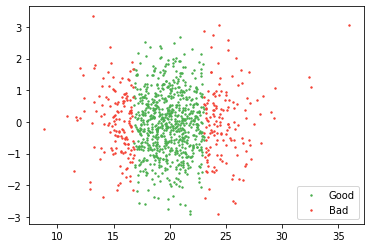

In [12]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean) / std)

# remove data points that are more than a selected # of std. dev. from the mean
threshold = 1
good = z_score < threshold

print(f"Rejected {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")

visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=2, label="Bad", color="#F44336")
plt.legend();

### 2-Dimensional

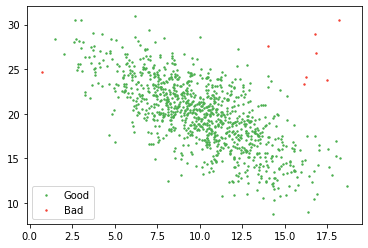

In [16]:
mean, cov = np.mean(d2, axis=0), np.cov(d2.T)

# select a probability to set as threshold
good = mn(mean, cov).pdf(d2) > 0.01 / 100

plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=2, label="Bad", color="#F44336")
plt.legend();

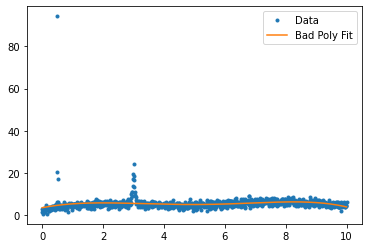

In [18]:
xs, ys = d3.T
p = np.polyfit(xs, ys, deg=5)
ps = np.polyval(p, xs)

plt.plot(xs, ys, ".", label="Data")
plt.plot(xs, ps, label="Bad Poly Fit")
plt.legend();

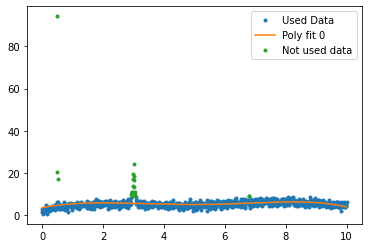

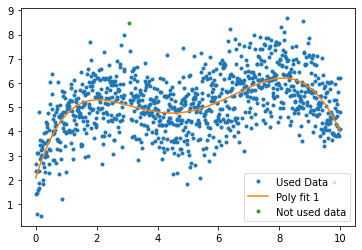

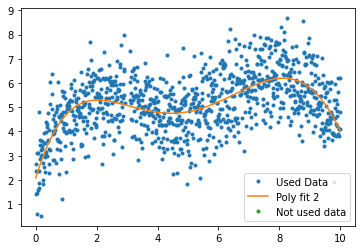

In [20]:
x, y = xs.copy(), ys.copy()

for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y - ps < 3
    
    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]
    
    plt.plot(x, y, ".", label="Used Data")
    plt.plot(x, np.polyval(p, x), label=f"Poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label="Not used data")
    plt.legend()
    plt.show()
    
    if (~good).sum() == 0:
        break

### Use Sklearn to Identify Outliers

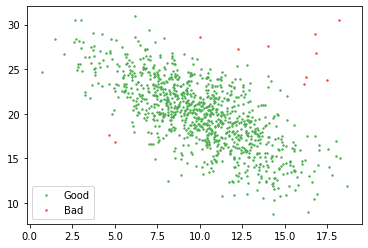

In [23]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
good = lof.fit_predict(d2) == 1

plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=2, label="Bad", color="#F44336")
plt.legend();